Bibliotecas:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Carregando o Arquivo:

In [2]:
df=pd.read_csv("HouseSales.csv")

<b>id</b> : Identificação numérica

<b>date</b>: Data em que a casa foi vendida

<b>price</b>: Preço da casa

<b>bedrooms</b>: Número de Quartos

<b>bathrooms</b>: Número de Banheiros

<b>sqft_living</b>: Área da casa(m²)

<b>sqft_lot</b>: Área do Lote

<b>floors</b>: Quantidade de Andares

<b>waterfront</b>: Casa com visão para lago/mar

<b>view</b>: Has been viewed

<b>condition</b>: Uma avaliação da casa

<b>grade</b>: Nota para casa baseada na escala da imobiliária

<b>sqft_above</b>: Área da casa s/ porão

<b>sqft_basement</b>: Área do Porão

<b>yr_built</b>: Ano de Construção

<b>yr_renovated</b>: Ano da Reforma

<b>zipcode</b>: Código Zip(CEP)

<b>lat</b>: Latitude 

<b>long</b>: Longitude 

<b>sqft_living15</b>: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

<b>sqft_lot15</b>: LotSize area in 2015(implies-- some renovations)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Verificando os tipos de cada coluna:

In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Descrição grosseira dos dados: 


In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Retirando colunas das quais não utilizaremos nessa análise:

In [7]:
df.drop("id",axis=1,inplace=True)

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.drop("zipcode",axis=1,inplace=True)

Agora, no objetivo de termos previsões melhores, iremos dar valor aos campos sem valor.

In [10]:
print("Número de casas sem a informação da quantidade de quartos:", df['bedrooms'].isnull().sum())
print("Número de casas sem a informação da quantidade de banheiros:", df['bathrooms'].isnull().sum())

Número de casas sem a informação da quantidade de quartos: 13
Número de casas sem a informação da quantidade de banheiros: 10


Podemos agora substituir os valores que faltam em 'Bedrooms'(Qtd.Quartos) pela sua média.

In [11]:
media=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,media, inplace=True)

Podemos agora substituir os valores que faltam em 'Bathrooms'(Qtd.Banheiros) pela sua média.

In [12]:
media=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,media, inplace=True)

Conferindo:

In [13]:
print("Número de casas sem a informação da quantidade de quartos:", df['bedrooms'].isnull().sum())
print("Número de casas sem a informação da quantidade de banheiros:", df['bathrooms'].isnull().sum())

Número de casas sem a informação da quantidade de quartos: 0
Número de casas sem a informação da quantidade de banheiros: 0


## Análise dos Dados:

Como é a distribuição de andares:

In [14]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Como se relaciona graficamente, a existência de visão para lago/mar e o preço ?

<AxesSubplot:xlabel='waterfront', ylabel='price'>

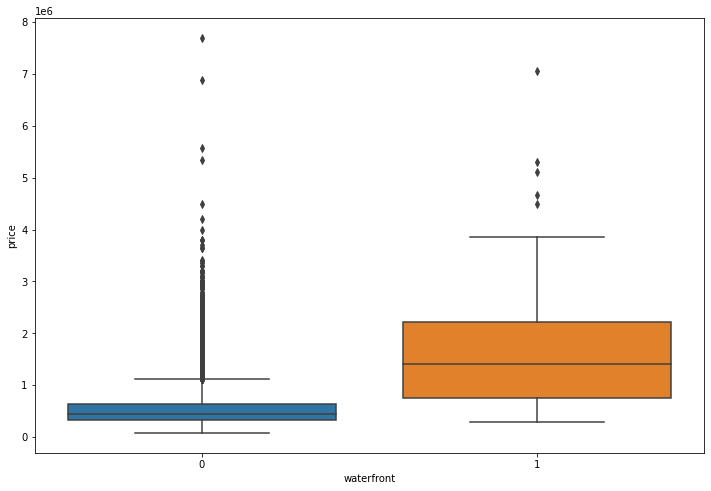

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x="waterfront",y="price",data=df)

Considerando, como bool a coluna 'waterfront', entedemos que 1 significa que a casa contêm vista para o mar/lago e 0 significa que a casa não tem a vista para o mar/lago.

Dessa forma, percebemos um acrescimo do preço a partir que a casa possui vista para o mar/lago.

Agora, analisando o preço da casa a partir da área da casa s/ a área do porão:

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

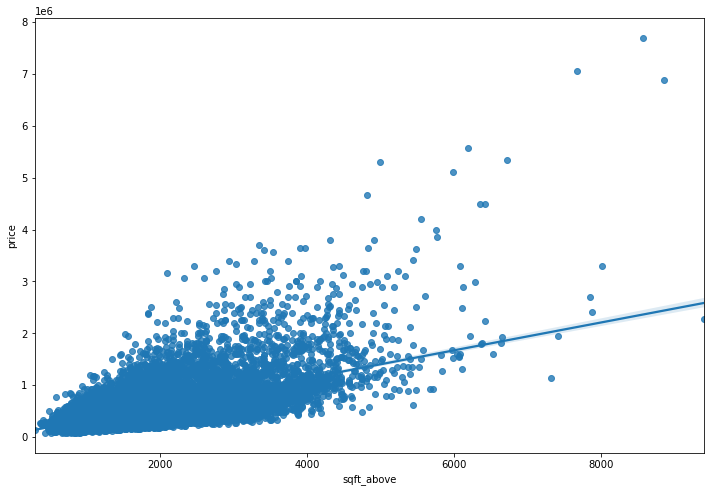

In [16]:
plt.figure(figsize=(12,8))
sns.regplot(x="sqft_above",y="price",data=df)

Percebemos que por até 4000m² preço e área se correlacionam de certa forma. Depois temos um espalhamento crescente. 

Para sermos mais otimizados, podemos ver qual coluna que melhor se relaciona com o preço.

In [17]:
df.corr()['price'].sort_values()

long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Vemos que quanto mais perto do 1, mais afinidade tem com o preço. Ou seja,'sqft-living'(Área da Casa-m²) é um bom influenciador/indicador de preço da casa. Nesse caso, por ser uma relação positiva, quanto maior a área da casa, maior será o preço do imóvel.

## Desenvolvendo um modelo:

Treinando um modelo simples de regressão linear a partir da coluna 'long'. Utilizaremos também a função score(), que está relacionada a precisão do modelo.

In [18]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Após calcularmos o R² percebemos que 'long' não é um bom preditor de preço. Isso já havia sido concluido ao utilizarmos a função "corr()"

Agora utilizaremos um dos preditores mais indicados 'sqrt_living'. Utilizando o mesmo modelo de regressão linear:

In [20]:
X1 = df[['sqft_living']]
lm1 = LinearRegression()
lm1.fit(X1,Y)
lm1.score(X1,Y)

0.4928532179037931

Vemos agora, um R² aproximadamente igual a 0,5. Não é dos melhores, mas está bem a frente do R² utilizado no 'long'.

<b>É importante salientar que o R² está limitado entre 0 e 1. Quanto mais perto do 1, melhor será o modelo. Quanto mais perto do 0, pior será o modelo.</b>

Agora a utilização de Regressão Linear, porém utilizando mais de um preditor. 

In [24]:
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]    

In [25]:
Mult = LinearRegression()
Mult.fit(features,Y)
Mult.score(features,Y)


0.6576951666037502

Percebemos que o R² desse modelo com mais de um preditor revela uma precisão um pouco melhor que os anteriores.

Por fim, criaremos uma Pipeline, que pode ser entendida como uma cadeia de processos. Nesse caso eu defino um Input, que dará as caracteristicas do Pipeline

In [27]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [28]:
pipe=Pipeline(Input)

features = features.astype(float)

pipe.fit(features,Y)
pipe.score(features,Y)

0.7513406905914715

Vemos aqui, uma melhora na nossa precisão quanto à predição de preço. Perceba que o modelo permanece sendo baseado em Regressão Linear. 





<b>Arquivo criado e editado por Elias Mendes</b>

**email: eliasmnds.cs@gmail.com**